In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [4]:
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [5]:
oe = OrdinalEncoder()

x.loc[:,"Geography":'Gender'] = oe.fit_transform(x.loc[:,"Geography":'Gender'])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52


In [6]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [8]:
ann =Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=250)

Epoch 1/250
250/250 [==============================] - 3s 5ms/step - loss: 0.4762 - val_loss: 0.4344
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4175 - val_loss: 0.4036
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3895 - val_loss: 0.3760
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3702 - val_loss: 0.3592
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3606 - val_loss: 0.3535
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3545 - val_loss: 0.3493
Epoch 7/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3522 - val_loss: 0.3470
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3479 - val_loss: 0.3505
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3470 - val_loss: 0.3434
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3436 - val_lo

<AxesSubplot:>

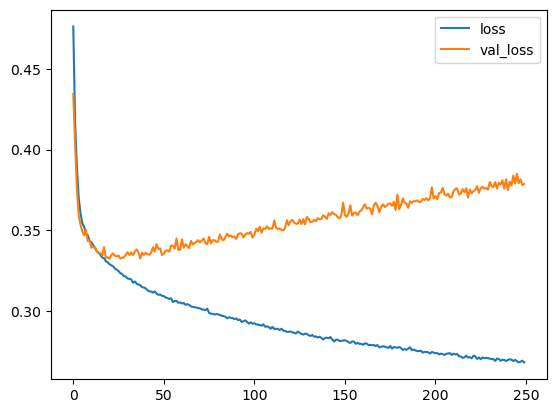

In [9]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

# Early Stopping

In [10]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [11]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.4867 - val_loss: 0.4336
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4250 - val_loss: 0.4167
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4089 - val_loss: 0.4014
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3940 - val_loss: 0.3840
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3763 - val_loss: 0.3663
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3605 - val_loss: 0.3553
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3529 - val_loss: 0.3488
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3487 - val_loss: 0.3482
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3452 - val_loss: 0.3470
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3432 - val_lo

<AxesSubplot:>

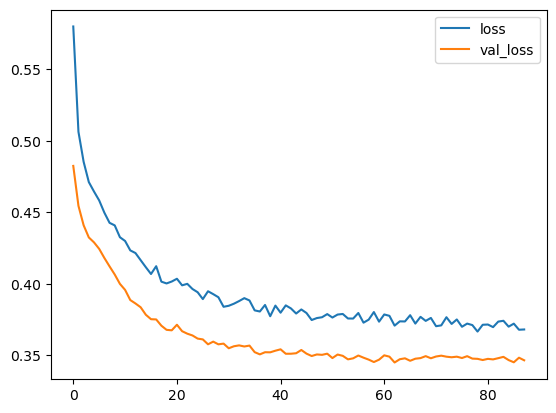

In [18]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Drop Out Layer

In [13]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 250)

Epoch 1/250
250/250 [==============================] - 2s 5ms/step - loss: 0.5759 - val_loss: 0.4739
Epoch 2/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4899 - val_loss: 0.4481
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4807 - val_loss: 0.4403
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4690 - val_loss: 0.4326
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4615 - val_loss: 0.4261
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4537 - val_loss: 0.4213
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4449 - val_loss: 0.4122
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4404 - val_loss: 0.4079
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4343 - val_loss: 0.4023
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4340 - val_lo

<AxesSubplot:>

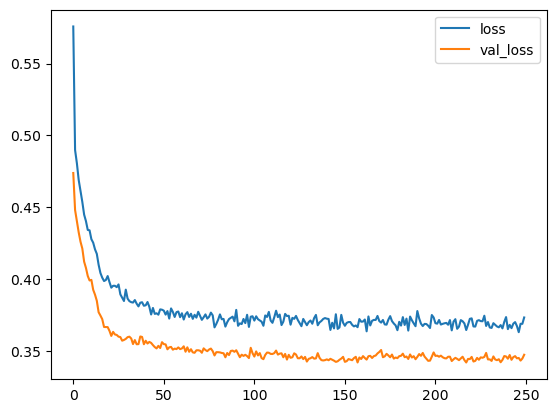

In [14]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early Stopping + Drop Out layer

In [15]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 250)

Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.5798 - val_loss: 0.4824
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.5062 - val_loss: 0.4545
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4853 - val_loss: 0.4410
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4711 - val_loss: 0.4325
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4645 - val_loss: 0.4290
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4583 - val_loss: 0.4245
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4498 - val_loss: 0.4181
Epoch 8/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4427 - val_loss: 0.4122
Epoch 9/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4409 - val_loss: 0.4066
Epoch 10/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4326 - val_lo

<AxesSubplot:>

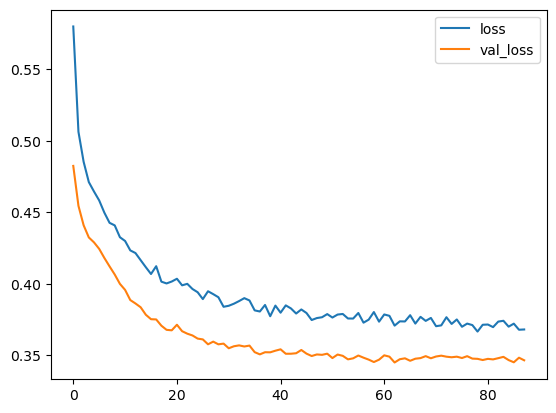

In [16]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

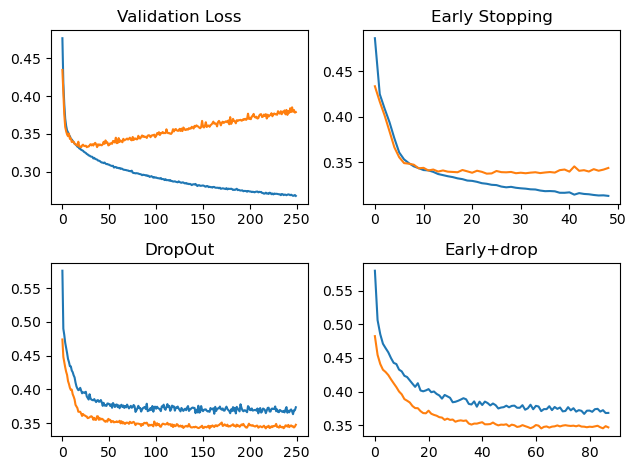

In [17]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()